### Sprint 4

Members:
 * Beena
 * Chitrank
 * Salman

Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from boruta import BorutaPy
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.preprocessing import LabelEncoder

ModuleNotFoundError: No module named 'boruta'

Data import

In [ ]:

# Specify the file path
file_path = r'/Users/salman/AI_for_buisness/loblaws.csv'

# Load the dataset into a pandas DataFrame
data = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
data.head()


CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome   
0       50001      1     4.0         Mobile Phone         3              6.0  \
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered   
0           Debit Card  Female             3.0                         3  \
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress   
0  Laptop & Accessory                  2        Single                9  \
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount   
0         1                         11.0         1.0         1.0  \
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [ ]:
# Check for missing values in the entire DataFrame
missing_values = data.isnull().sum()

# Display the count of missing values for each column
print("Missing Values:")
print(missing_values)


Missing Values:
CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64


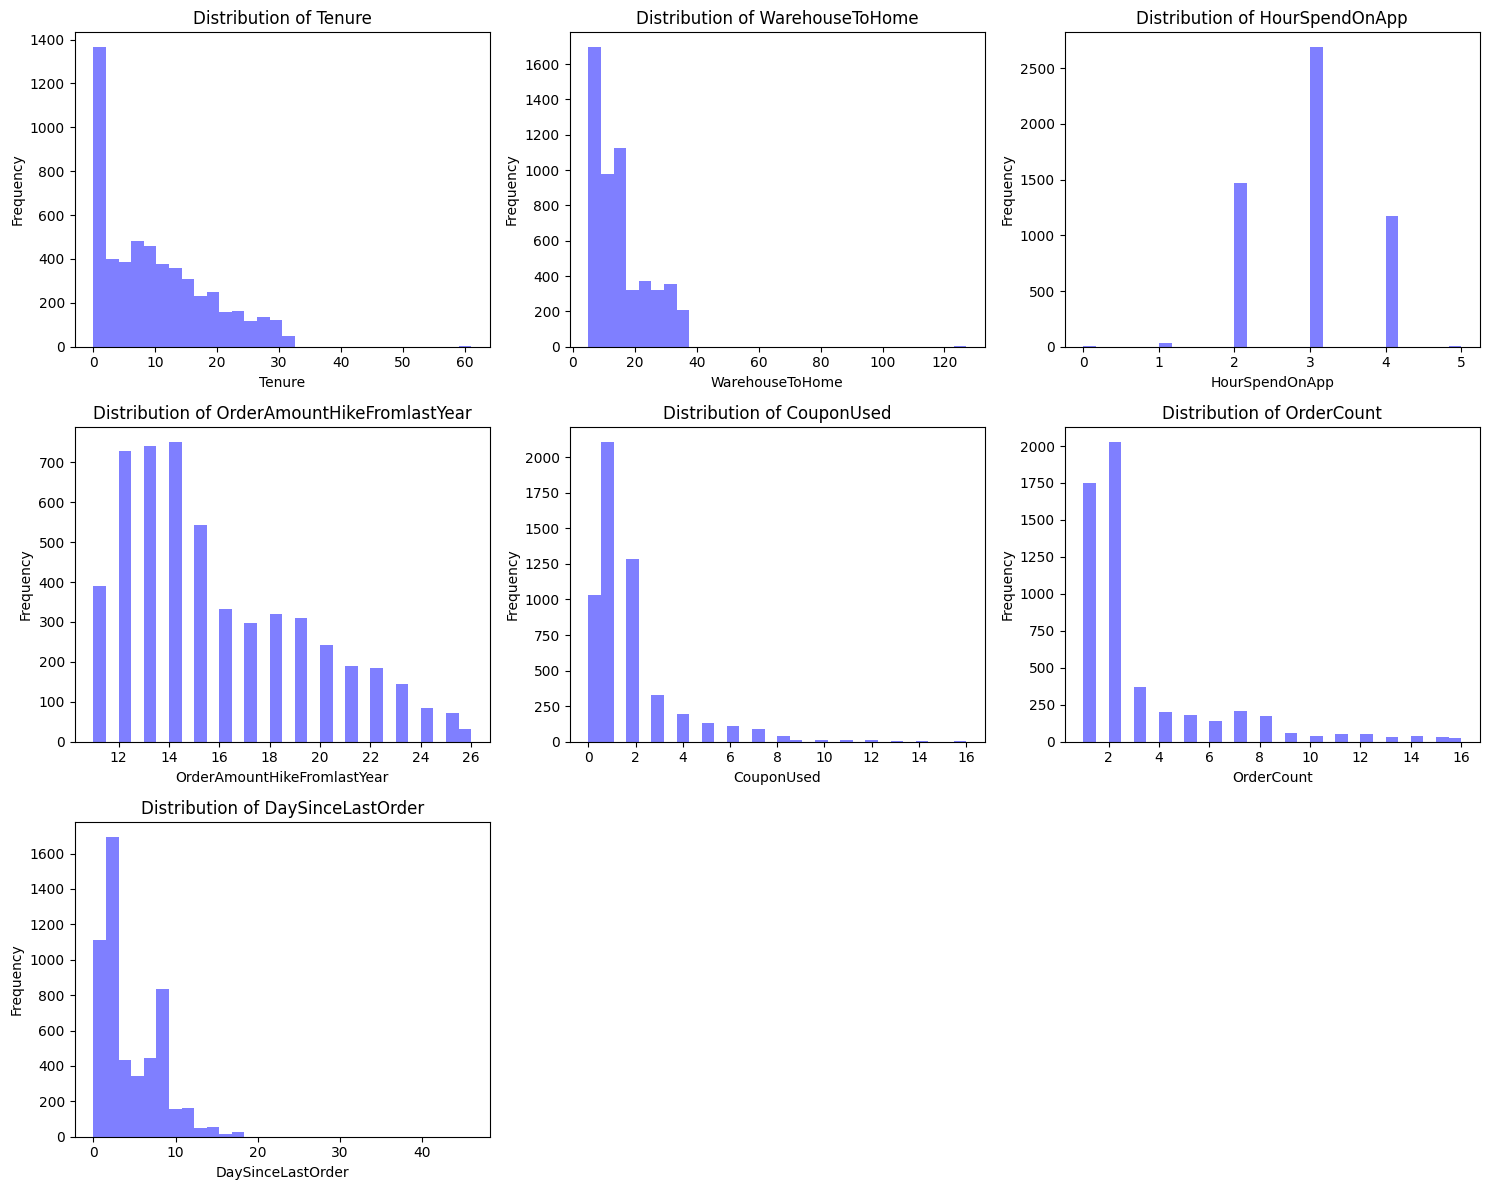

In [ ]:
columns_to_plot = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 
                   'OrderAmountHikeFromlastYear', 'CouponUsed', 
                   'OrderCount', 'DaySinceLastOrder']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 12))

for i, column in enumerate(columns_to_plot):
    row = i // 3
    col = i % 3
    data[column].plot(kind='hist', bins=30, alpha=0.5, color='blue', ax=axes[row, col])
    axes[row, col].set_title(f'Distribution of {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')

# Hide empty subplots
for j in range(i+1, 9):
    row = j // 3
    col = j % 3
    fig.delaxes(axes[row][col])

plt.tight_layout()
plt.show()

In [ ]:
# imputer for missing values in hour spend on app
data['HourSpendOnApp'].fillna(data['HourSpendOnApp'].mean(), inplace=True)

In [ ]:
# Impute missing values with median for the following columns
columns_to_impute = ['Tenure', 'WarehouseToHome', 
                     'OrderAmountHikeFromlastYear', 'CouponUsed', 
                     'OrderCount', 'DaySinceLastOrder']

for column in columns_to_impute:
    data[column].fillna(data[column].median(), inplace=True)

In [ ]:
# Iterate over columns and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Unique values of {column}: {unique_values}')


Unique values of CustomerID: [50001 50002 50003 ... 55628 55629 55630]
Unique values of Churn: [1 0]
Unique values of Tenure: [ 4.  9.  0. 13. 11. 19. 20. 14.  8. 18.  5.  2. 30.  1. 23.  3. 29.  6.
 26. 28.  7. 24. 25. 10. 15. 22. 27. 16. 12. 21. 17. 50. 60. 31. 51. 61.]
Unique values of PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values of CityTier: [3 1 2]
Unique values of WarehouseToHome: [  6.   8.  30.  15.  12.  22.  11.   9.  31.  18.  13.  20.  29.  28.
  26.  14.  10.  27.  17.  23.  33.  19.  35.  24.  16.  25.  32.  34.
   5.  21. 126.   7.  36. 127.]
Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Unique values of Gender: ['Female' 'Male']
Unique values of HourSpendOnApp: [3.         2.         2.93153488 1.         0.         4.
 5.        ]
Unique values of NumberOfDeviceRegistered: [3 4 5 2 1 6]
Unique values of PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others'

In [ ]:
columns_to_round = ['OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 
                    'DaySinceLastOrder', 'Tenure', 'HourSpendOnApp', 'WarehouseToHome']

for column in columns_to_round:
    data[column] = data[column].round().astype(int)


In [ ]:
# Iterate over columns and print unique values
for column in data.columns:
    unique_values = data[column].unique()
    print(f'Unique values of {column}: {unique_values}')


Unique values of CustomerID: [50001 50002 50003 ... 55628 55629 55630]
Unique values of Churn: [1 0]
Unique values of Tenure: [ 4  9  0 13 11 19 20 14  8 18  5  2 30  1 23  3 29  6 26 28  7 24 25 10
 15 22 27 16 12 21 17 50 60 31 51 61]
Unique values of PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values of CityTier: [3 1 2]
Unique values of WarehouseToHome: [  6   8  30  15  12  22  11   9  31  18  13  20  29  28  26  14  10  27
  17  23  33  19  35  24  16  25  32  34   5  21 126   7  36 127]
Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Unique values of Gender: ['Female' 'Male']
Unique values of HourSpendOnApp: [3 2 1 0 4 5]
Unique values of NumberOfDeviceRegistered: [3 4 5 2 1 6]
Unique values of PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
Unique values of SatisfactionScore: [2 3 5 4 1]
Unique values of MaritalStatus: ['Single' 'Divorced' 'Marri

In [ ]:
unique_values_PreferredPaymentMode = data['PreferredPaymentMode'].unique()
print(f'Unique values of PreferredPaymentMode: {unique_values_PreferredPaymentMode}')

unique_values_PreferredLoginDevice = data['PreferredLoginDevice'].unique()
print(f'Unique values of PreferredLoginDevice: {unique_values_PreferredLoginDevice}')

unique_values_MaritalStatus = data['MaritalStatus'].unique()
print(f'Unique values of MaritalStatus: {unique_values_MaritalStatus}')

unique_values_PreferedOrderCat = data['PreferedOrderCat'].unique()
print(f'Unique values of PreferedOrderCategory: {unique_values_PreferedOrderCat}')

Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card']
Unique values of PreferredLoginDevice: ['Mobile Phone' 'Phone' 'Computer']
Unique values of MaritalStatus: ['Single' 'Divorced' 'Married']
Unique values of PreferedOrderCategory: ['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']


Dropping 2 irrelevant columns: 'CustomerID'

In [ ]:
data = data.drop(['CustomerID'], axis=1)
data.columns

Index(['Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [ ]:
data['PreferredLoginDevice'] = data['PreferredLoginDevice'].replace('Mobile Phone', 'Phone')
unique_values_PreferredLoginDevice = data['PreferredLoginDevice'].unique()
print(f'Unique values of PreferredLoginDevice: {unique_values_PreferredLoginDevice}')

data['PreferredLoginDevice'] = data['PreferredLoginDevice'].map({'Phone': 0, 'Computer': 1})
data['MaritalStatus'] = data['MaritalStatus'].map({'Single': 0, 'Divorced': 1, 'Married': 2})
data['Gender'], mapping = data['Gender'].factorize()
print(mapping)

data['PreferedOrderCat'] = data['PreferedOrderCat'].replace('Mobile Phone', 'Mobile')
unique_values_PreferedOrderCat = data['PreferedOrderCat'].unique()
print(f'Unique values of PreferedOrderCategory: {unique_values_PreferedOrderCat}')

data['PreferedOrderCat'], mapping = data['PreferedOrderCat'].factorize()
print(mapping)

# Combine 'COD' and 'Cash on Delivery'
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('COD', 'Cash on Delivery')

# Combine 'CC' and 'Credit Card'
data['PreferredPaymentMode'] = data['PreferredPaymentMode'].replace('CC', 'Credit Card')
unique_values_PreferredPaymentMode = data['PreferredPaymentMode'].unique()
print(f'Unique values of PreferredPaymentMode: {unique_values_PreferredPaymentMode}')

encoded_payment_mode, mapping = data['PreferredPaymentMode'].factorize()


print("\nMapping of Encoded Values to Original Categories:")
print(mapping)

data['PreferredPaymentMode'], mapping = data['PreferredPaymentMode'].factorize()
print(mapping)

Unique values of PreferredLoginDevice: ['Phone' 'Computer']
Index(['Female', 'Male'], dtype='object')
Unique values of PreferedOrderCategory: ['Laptop & Accessory' 'Mobile' 'Others' 'Fashion' 'Grocery']
Index(['Laptop & Accessory', 'Mobile', 'Others', 'Fashion', 'Grocery'], dtype='object')
Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']

Mapping of Encoded Values to Original Categories:
Index(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'], dtype='object')
Index(['Debit Card', 'UPI', 'Credit Card', 'Cash on Delivery', 'E wallet'], dtype='object')


In [ ]:
unique_values_PreferredPaymentMode = data['PreferredPaymentMode'].unique()
print(f'Unique values of PreferredPaymentMode: {unique_values_PreferredPaymentMode}')

unique_values_PreferredLoginDevice = data['PreferredLoginDevice'].unique()
print(f'Unique values of PreferredLoginDevice: {unique_values_PreferredLoginDevice}')

unique_values_MaritalStatus = data['MaritalStatus'].unique()
print(f'Unique values of MaritalStatus: {unique_values_MaritalStatus}')

unique_values_PreferedOrderCat = data['PreferedOrderCat'].unique()
print(f'Unique values of PreferedOrderCategory: {unique_values_PreferedOrderCat}')

Unique values of PreferredPaymentMode: [0 1 2 3 4]
Unique values of PreferredLoginDevice: [0 1]
Unique values of MaritalStatus: [0 1 2]
Unique values of PreferedOrderCategory: [0 1 2 3 4]


In [ ]:
data.tail(10)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome   
5620      0       3                     0         1               35  \
5621      1      14                     0         3               35   
5622      0      13                     0         3               31   
5623      0       5                     1         1               12   
5624      0       1                     0         3               12   
5625      0      10                     1         1               30   
5626      0      13                     0         1               13   
5627      0       1                     0         1               11   
5628      0      23                     1         3                9   
5629      0       8                     0         1               15   

      PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered   
5620                     2       0               4                         5  \
5621                     4       1               3                         5   
5622                     4       0               3                         5   
5623                     2       1               4                         4   
5624                     1       0               2                         5   
5625                     2       1               3                         2   
5626                     2       1               3                         5   
5627                     0       1               3                         2   
5628                     2       1               4                         5   
5629                     2       1               3                         2   

      PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress   
5620                 1                  5              0                3  \
5621                 3                  5              2                6   
5622                 4                  1              2                2   
5623                 0                  5              0                2   
5624                 1                  3              0                2   
5625                 0                  1              2                6   
5626                 3                  5              2                6   
5627                 0                  4              2                3   
5628                 0                  4              2                4   
5629                 0                  3              2                4   

      Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount   
5620         0                           15           1           2  \
5621         1                           14           3           2   
5622         0                           12           4           2   
5623         0                           20           2           2   
5624         0                           19           2           2   
5625         0                           18           1           2   
5626         0                           16           1           2   
5627         1                           21           1           2   
5628         0                           15           2           2   
5629         0                           13           2           2   

      DaySinceLastOrder  CashbackAmount  
5620                  5             163  
5621                  1             234  
5622                  7             245  
5623                  3             224  
5624                  1             155  
5625                  4             151  
5626                  3             225  
5627                  4             186  
5628                  9             179  
5629                  3             169

In [ ]:
data.head(15)

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome   
0       1       4                     0         3                6  \
1       1       9                     0         1                8   
2       1       9                     0         1               30   
3       1       0                     0         3               15   
4       1       0                     0         1               12   
5       1       0                     1         1               22   
6       1       9                     0         3               11   
7       1       9                     0         1                6   
8       1      13                     0         3                9   
9       1       9                     0         1               31   
10      1       4                     0         1               18   
11      1      11                     0         1                6   
12      1       0                     0         1               11   
13      1       0                     0         1               15   
14      1       9                     0         3               15   

    PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered   
0                      0       0               3                         3  \
1                      1       1               3                         4   
2                      0       1               2                         4   
3                      0       1               2                         4   
4                      2       1               3                         3   
5                      0       0               3                         5   
6                      3       1               2                         3   
7                      2       1               3                         3   
8                      4       1               3                         4   
9                      0       1               2                         5   
10                     3       0               2                         3   
11                     0       1               3                         4   
12                     3       1               2                         3   
13                     2       1               3                         4   
14                     2       1               3                         4   

    PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress   
0                  0                  2              0                9  \
1                  1                  3              0                7   
2                  1                  3              0                6   
3                  0                  5              0                8   
4                  1                  5              0                3   
5                  1                  5              0                2   
6                  0                  2              1                4   
7                  1                  2              1                3   
8                  1                  3              1                2   
9                  1                  3              0                2   
10                 2                  3              1                2   
11                 3                  3              0               10   
12                 1                  3              0                2   
13                 1                  3              1                1   
14                 3                  2              0                2   

    Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount   
0          1                           11           1           1  \
1          1                           15           0           1   
2          1                           14           0           1   
3          0                           23           0           1   
4          0                           11           1           1   
5          1       

Descriptive statistics

In [ ]:
data.describe()

Churn       Tenure  PreferredLoginDevice     CityTier   
count  5630.000000  5630.000000           5630.000000  5630.000000  \
mean      0.168384    10.134103              0.290231     1.654707   
std       0.374240     8.357951              0.453909     0.915389   
min       0.000000     0.000000              0.000000     1.000000   
25%       0.000000     3.000000              0.000000     1.000000   
50%       0.000000     9.000000              0.000000     1.000000   
75%       0.000000    15.000000              1.000000     3.000000   
max       1.000000    61.000000              1.000000     3.000000   

       WarehouseToHome  PreferredPaymentMode       Gender  HourSpendOnApp   
count      5630.000000           5630.000000  5630.000000     5630.000000  \
mean         15.566785              1.413854     0.601066        2.934636   
std           8.345961              1.379089     0.489723        0.705528   
min           5.000000              0.000000     0.000000        0.000000   
25%           9.000000              0.000000     0.000000        2.000000   
50%          14.000000              2.000000     1.000000        3.000000   
75%          20.000000              2.000000     1.000000        3.000000   
max         127.000000              4.000000     1.000000        5.000000   

       NumberOfDeviceRegistered  PreferedOrderCat  SatisfactionScore   
count               5630.000000       5630.000000        5630.000000  \
mean                   3.688988          1.194671           3.066785   
std                    1.023999          1.271092           1.380194   
min                    1.000000          0.000000           1.000000   
25%                    3.000000          0.000000           2.000000   
50%                    4.000000          1.000000           3.000000   
75%                    4.000000          2.000000           4.000000   
max                    6.000000          4.000000           5.000000   

       MaritalStatus  NumberOfAddress     Complain   
count    5630.000000      5630.000000  5630.000000  \
mean        1.211368         4.214032     0.284902   
std         0.897132         2.583586     0.451408   
min         0.000000         1.000000     0.000000   
25%         0.000000         2.000000     0.000000   
50%         2.000000         3.000000     0.000000   
75%         2.000000         6.000000     1.000000   
max         2.000000        22.000000     1.000000   

       OrderAmountHikeFromlastYear   CouponUsed   OrderCount   
count                  5630.000000  5630.000000  5630.000000  \
mean                     15.674600     1.716874     2.961812   
std                       3.591058     1.857640     2.879248   
min                      11.000000     0.000000     1.000000   
25%                      13.000000     1.000000     1.000000   
50%                      15.000000     1.000000     2.000000   
75%                      18.000000     2.000000     3.000000   
max                      26.000000    16.000000    16.000000   

       DaySinceLastOrder  CashbackAmount  
count        5630.000000     5630.000000  
mean            4.459325      177.221492  
std             3.570626       49.193869  
min             0.000000        0.000000  
25%             2.000000      146.000000  
50%             3.000000      163.000000  
75%             7.000000      196.000000  
max            46.000000      325.000000

### General Observations:
- The dataset contains information on 5630 customers (indicated by the count for most variables).
- There are some missing values in the variables "Tenure," "WarehouseToHome," "HourSpendOnApp," "OrderAmountHikeFromlastYear," "CouponUsed," "OrderCount," and "DaySinceLastOrder." The extent of missing data varies, with "Tenure" having the most missing values (around 254).

### Specific Variable Insights:
- **Tenure:**
  - The average customer tenure is about 10 months (mean: 10.189899).
  - The standard deviation of 8.557241 suggests a fair amount of variability in tenure lengths.
  - The minimum tenure is 0 months, while the maximum is 61 months.
- **CityTier:**
  - The average city tier is 1.654707. Without more context about the city tier classification, it's difficult to interpret this directly.
  - The standard deviation of 0.915389 indicates some spread in the city tier distribution.
- **WarehouseToHome:**
  - The average distance between the warehouse and customer's home is roughly 15.64 units (mean: 15.639896).
  - The standard deviation of 8.531475 suggests variability in these distances.
- **HourSpendOnApp:**
  - Customers spend an average of 2.93 hours on the app or website (mean: 2.931535).
  - The standard deviation of 0.721926 indicates a moderate degree of variation in app/website usage time.
- **SatisfactionScore:**
  - The average satisfaction score is around 3.06 (mean: 3.066785). Again, without knowing the scoring scale, direct interpretation is limited.
  - The standard deviation of 1.380194 suggests a reasonable range of satisfaction levels.
- **NumberOfAddress:**
  - Customers have an average of 4.21 addresses associated with their accounts (mean: 4.214032).
  - The standard deviation of 2.583586 indicates considerable variation in the number of addresses.
- **Complain:**
  - About 28.49% of customers have raised a complaint in the last month (mean: 0.284902).
- **OrderAmountHikeFromlastYear:**
  - The average order amount has increased by approximately 15.71% from the previous year (mean: 15.707922).
  - The standard deviation of 3.675485 suggests some variation in this growth rate.
- **CouponUsed:**
  - Customers have used an average of 1.75 coupons in the last month (mean: 1.751023).
- **OrderCount:**
  - The average number of orders placed in the last month is around 3 (mean: 3.008004).
- **DaySinceLastOrder:**
  - The average number of days since the last order is about 4.54 (mean: 4.543491).
- **CashbackAmount:**
  - The average cashback received in the last month is approximately 177.22 units (mean: 177.223030).

Churn Analysis: Plotting the distribution of churned vs. non-churned customers.

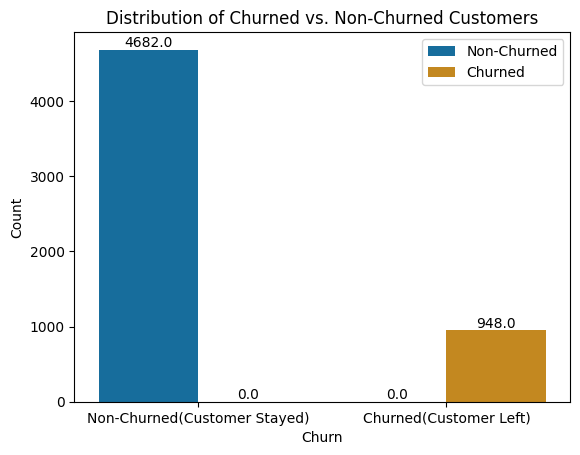

In [ ]:
colors = sns.color_palette('colorblind')

# Plotting the distribution of churned vs. non-churned customers
ax = sns.countplot(x='Churn', hue='Churn', data=data, palette=colors)

# Calculate counts for each category
counts = data['Churn'].value_counts()

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.title('Distribution of Churned vs. Non-Churned Customers')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Non-Churned(Customer Stayed)', 'Churned(Customer Left)'], rotation=0)
plt.legend(['Non-Churned', 'Churned'])  # Adding legend manually
plt.show()

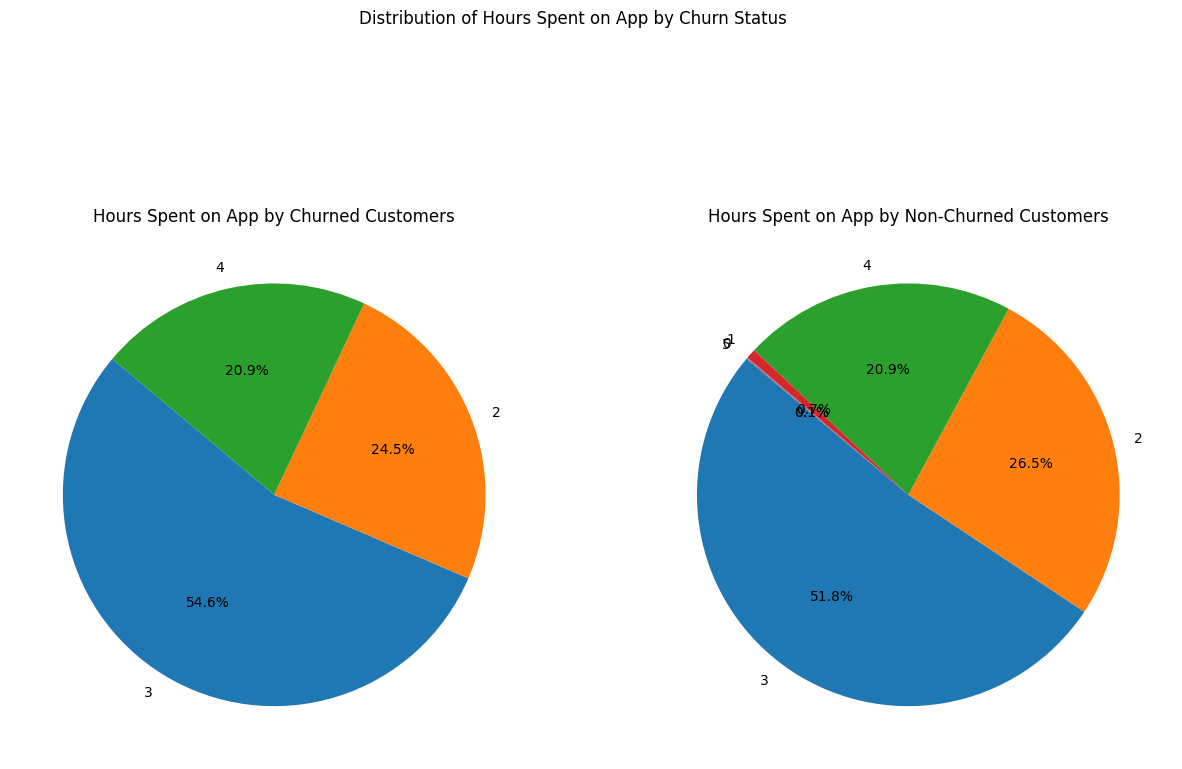

In [ ]:

# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Pie chart for HourSpendOnApp of churned customers
churned_hours_counts = churned_data['HourSpendOnApp'].value_counts()
axes[0].pie(churned_hours_counts, labels=churned_hours_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Hours Spent on App by Churned Customers')

# Pie chart for HourSpendOnApp of non-churned customers
non_churned_hours_counts = non_churned_data['HourSpendOnApp'].value_counts()
axes[1].pie(non_churned_hours_counts, labels=non_churned_hours_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Hours Spent on App by Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Hours Spent on App by Churn Status')

plt.show()

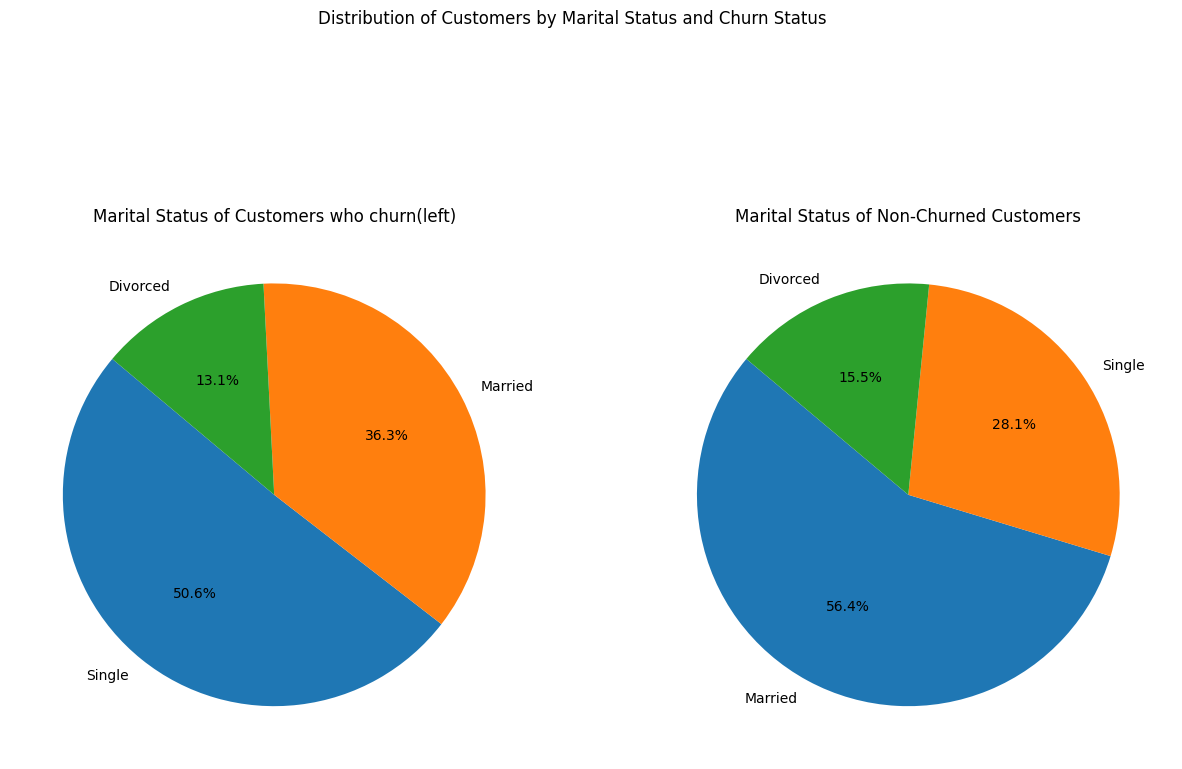

In [ ]:
marital_status_mapping = {
    0: 'Single', 
    1: 'Divorced', 
    2: 'Married'
}

# Map the numerical values to marital status names
data['MaritalStatus'] = data['MaritalStatus'].map(marital_status_mapping)

# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Pie chart for churned customers
churned_counts = churned_data['MaritalStatus'].value_counts()
axes[0].pie(churned_counts, labels=churned_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Marital Status of Customers who churn(left)')

# Pie chart for non-churned customers
non_churned_counts = non_churned_data['MaritalStatus'].value_counts()
axes[1].pie(non_churned_counts, labels=non_churned_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Marital Status of Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Customers by Marital Status and Churn Status')

plt.show()

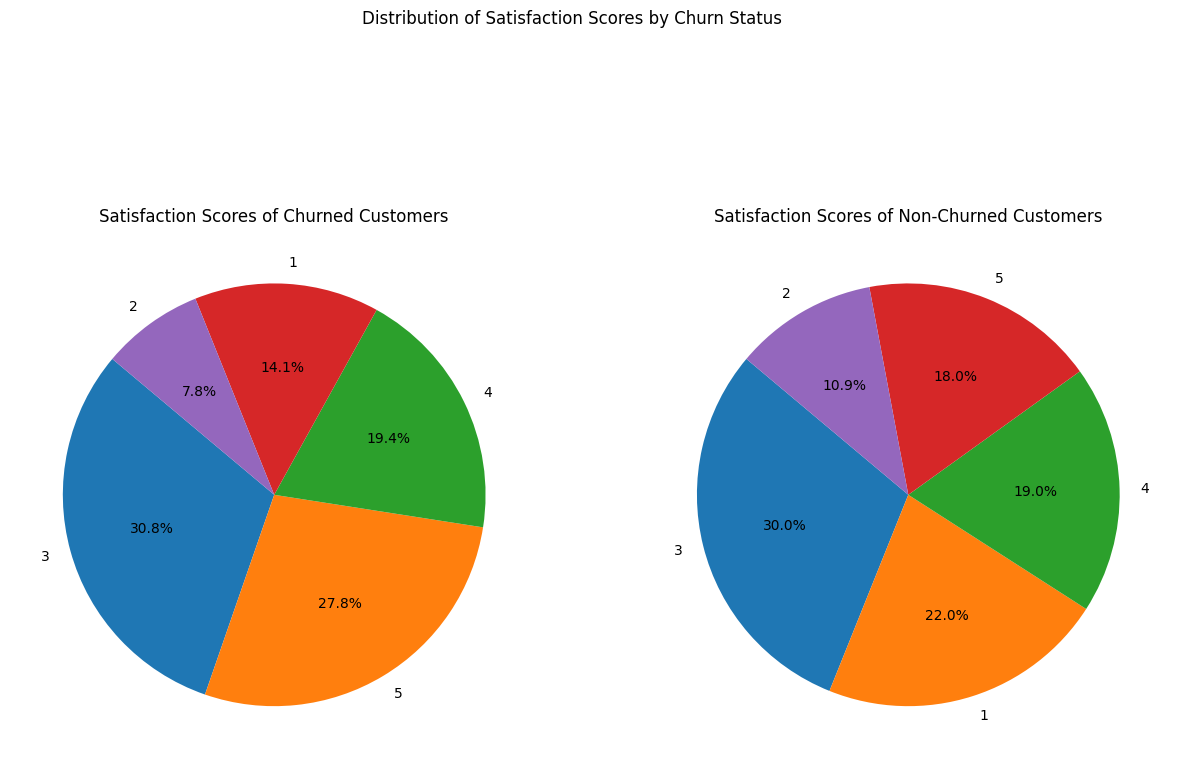

In [ ]:
# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Pie chart for satisfaction scores of churned customers
churned_satisfaction_counts = churned_data['SatisfactionScore'].value_counts()
axes[0].pie(churned_satisfaction_counts, labels=churned_satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Satisfaction Scores of Churned Customers')

# Pie chart for satisfaction scores of non-churned customers
non_churned_satisfaction_counts = non_churned_data['SatisfactionScore'].value_counts()
axes[1].pie(non_churned_satisfaction_counts, labels=non_churned_satisfaction_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Satisfaction Scores of Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Satisfaction Scores by Churn Status')

plt.show()

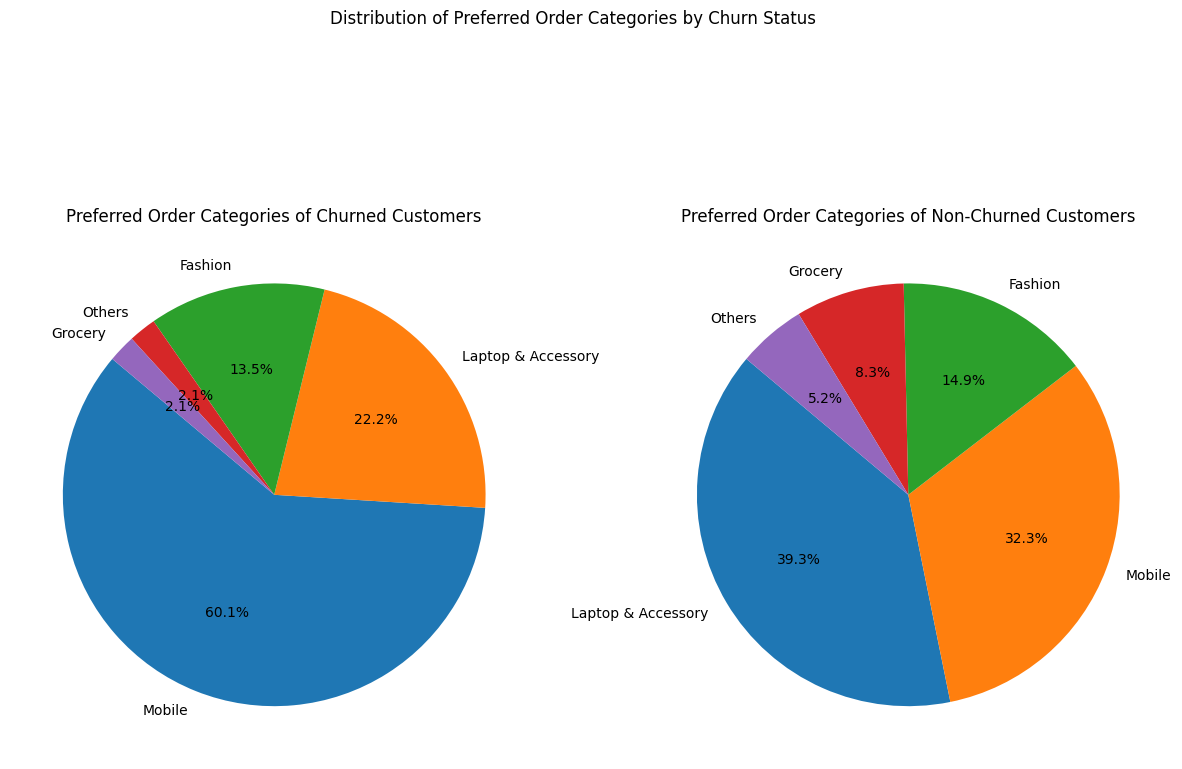

In [ ]:
# Define mapping of numerical values to category names
category_mapping = {
    0: 'Laptop & Accessory',
    1: 'Mobile',
    2: 'Others',
    3: 'Fashion',
    4: 'Grocery'
}

# Map numerical values to category names in the DataFrame
data['PreferedOrderCat'] = data['PreferedOrderCat'].map(category_mapping)

# Filter data for churned and non-churned customers
churned_data = data[data['Churn'] == 1]
non_churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10))

# Pie chart for preferred order categories of churned customers
churned_order_cat_counts = churned_data['PreferedOrderCat'].value_counts()
axes[0].pie(churned_order_cat_counts, labels=churned_order_cat_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('Preferred Order Categories of Churned Customers')

# Pie chart for preferred order categories of non-churned customers
non_churned_order_cat_counts = non_churned_data['PreferedOrderCat'].value_counts()
axes[1].pie(non_churned_order_cat_counts, labels=non_churned_order_cat_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Preferred Order Categories of Non-Churned Customers')

# Overall title
plt.suptitle('Distribution of Preferred Order Categories by Churn Status')

plt.show()


* Ploting a bar chart to see if customers with shorter tenures are more likely to churn.

* Shorter tenure might indicate a lack of engagement or satisfaction with the service.

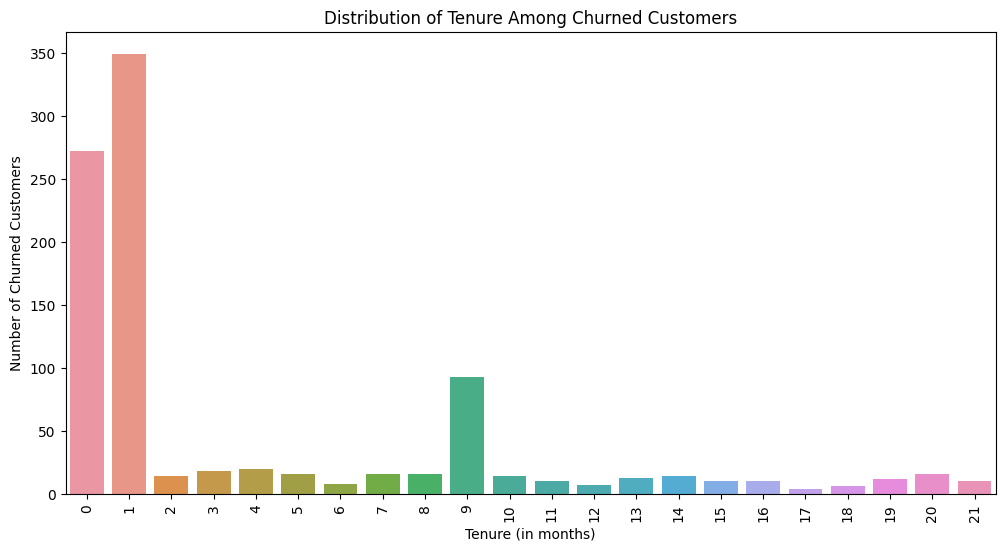

In [ ]:
# Filter data for churned customers
churned_data = data[data['Churn'] == 1]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for the tenure of churned customers
sns.countplot(x='Tenure', data=churned_data)
plt.title('Distribution of Tenure Among Churned Customers')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=90)  # Rotates X-axis labels for better readability

plt.show()

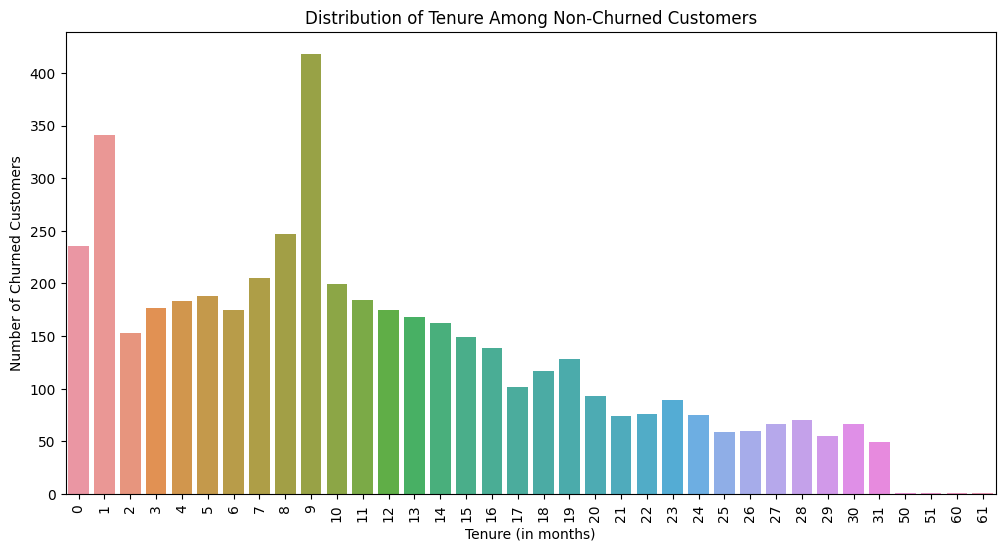

In [ ]:
# Filter data for churned customers
churned_data = data[data['Churn'] == 0]

# Set up the matplotlib figure
plt.figure(figsize=(12, 6))

# Create a bar plot for the tenure of churned customers
sns.countplot(x='Tenure', data=churned_data)
plt.title('Distribution of Tenure Among Non-Churned Customers')
plt.xlabel('Tenure (in months)')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=90)  # Rotates X-axis labels for better readability

plt.show()

Preferred Login Device: Visualizing the distribution of preferred login devices among customers.


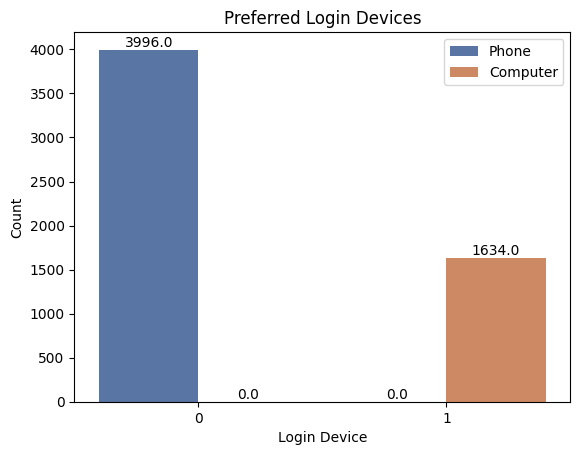

In [ ]:
colors = sns.color_palette('deep')

# Plotting the distribution of preferred login devices
ax = sns.countplot(x='PreferredLoginDevice', hue='PreferredLoginDevice', data=data, palette=colors)

# Calculate counts for each category
counts = data['PreferredLoginDevice'].value_counts()

# Annotate bars with counts
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, height, ha='center', va='bottom')

plt.title('Preferred Login Devices')
plt.xlabel('Login Device')
plt.ylabel('Count')
plt.legend(['Phone', 'Computer'])  # Adding legend manually
plt.show()




City Tier Analysis: Examining the distribution of customers across different city tiers.

Text(0, 0.5, 'Count')

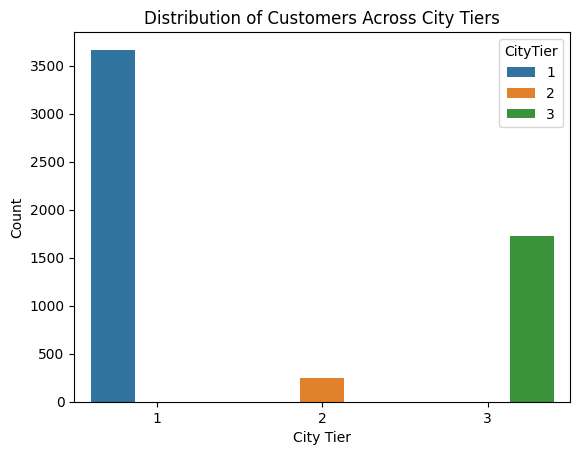

In [ ]:

sns.countplot(x='CityTier', hue="CityTier", data=data)
plt.title('Distribution of Customers Across City Tiers')
plt.xlabel('City Tier')
plt.ylabel('Count')


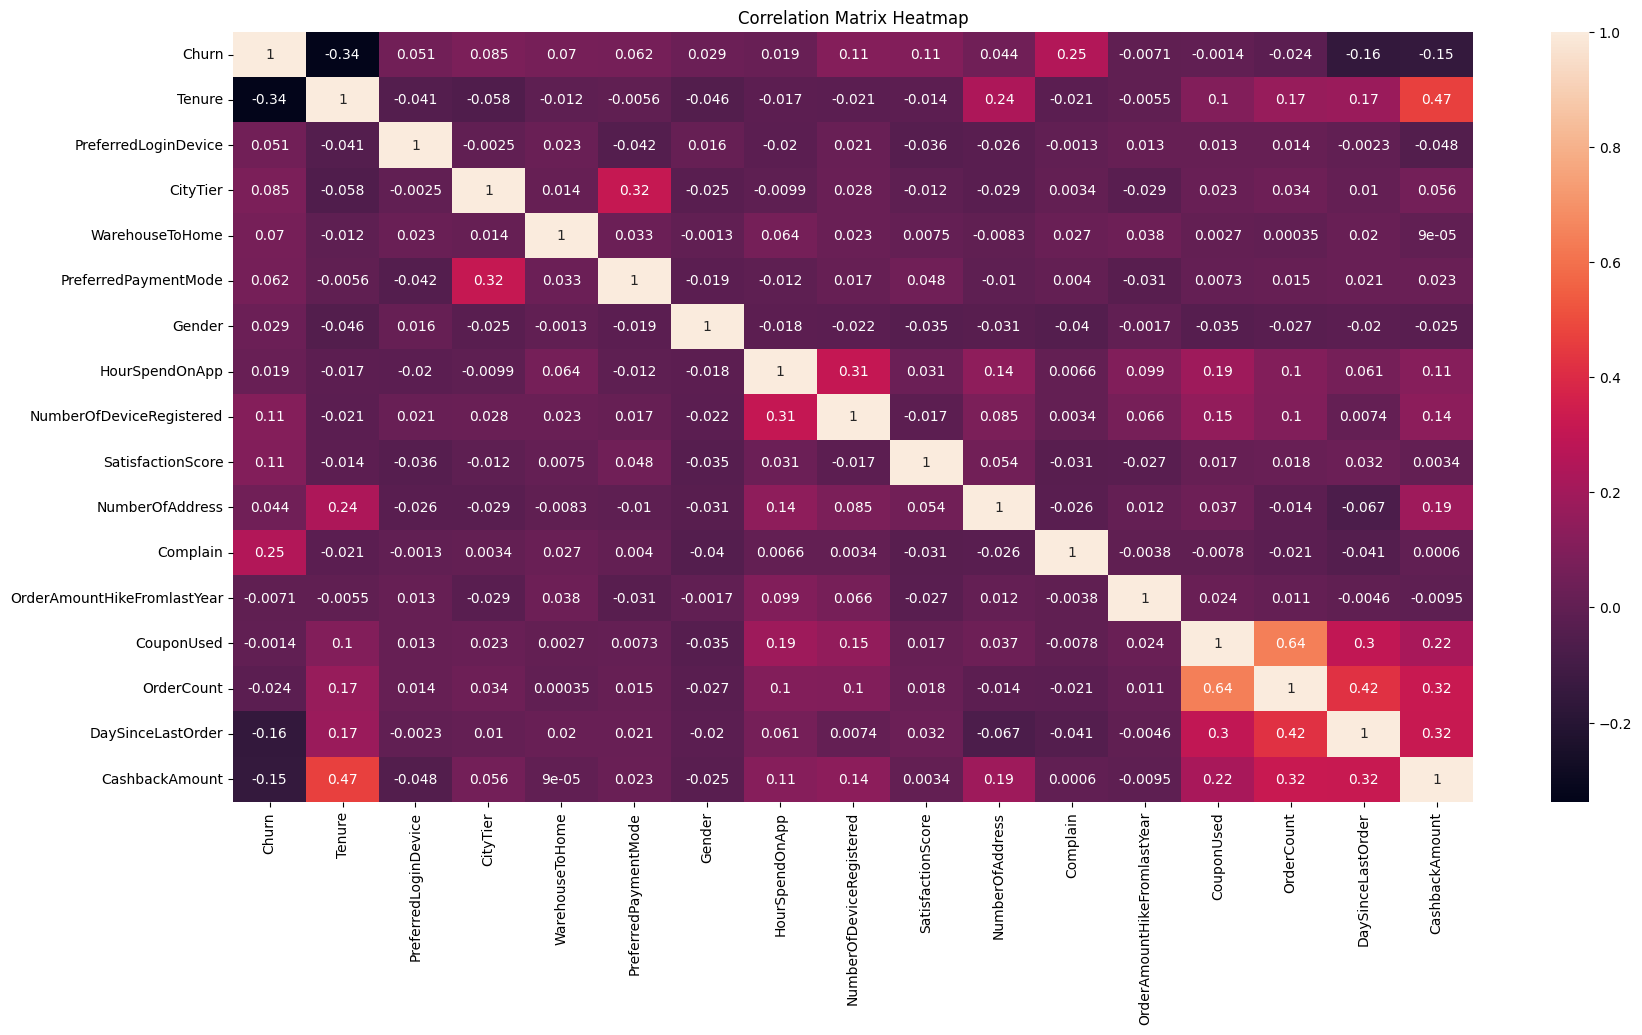

In [ ]:
# Remove non-numeric columns from the DataFrame
numeric_data = data.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_data.corr()

# Set the figure size
plt.figure(figsize=(20, 10))

# Plot the heatmap
sns.heatmap(corr_matrix, annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

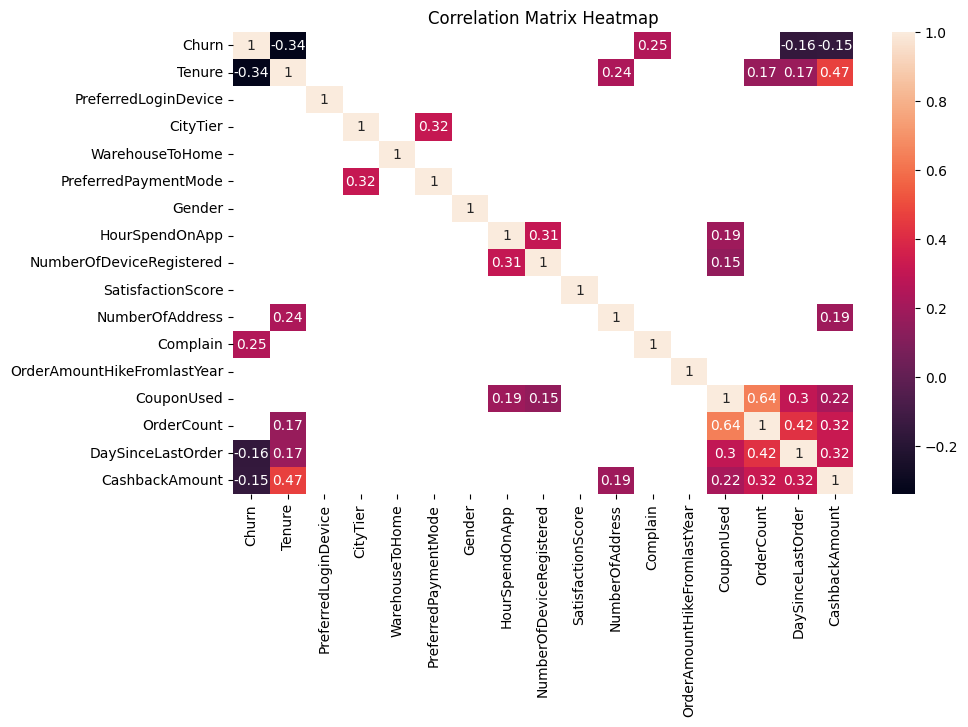

In [ ]:

# Set the threshold value for correlation
threshold = 0.15

# Create a boolean mask of correlations greater than the threshold
above_threshold_mask = abs(corr_matrix) > threshold

# Plot the heatmap for correlations above the threshold
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix[above_threshold_mask], annot=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [ ]:
object_columns = data.select_dtypes(include=['object']).columns
label_encoders={}
for col in object_columns:
    label_encoders[col]=LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

data.head(10)

    

Churn  Tenure  PreferredLoginDevice  CityTier  WarehouseToHome   
0      1       4                     0         3                6  \
1      1       9                     0         1                8   
2      1       9                     0         1               30   
3      1       0                     0         3               15   
4      1       0                     0         1               12   
5      1       0                     1         1               22   
6      1       9                     0         3               11   
7      1       9                     0         1                6   
8      1      13                     0         3                9   
9      1       9                     0         1               31   

   PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered   
0                     0       0               3                         3  \
1                     1       1               3                         4   
2                     0       1               2                         4   
3                     0       1               2                         4   
4                     2       1               3                         3   
5                     0       0               3                         5   
6                     3       1               2                         3   
7                     2       1               3                         3   
8                     4       1               3                         4   
9                     0       1               2                         5   

   PreferedOrderCat  SatisfactionScore  MaritalStatus  NumberOfAddress   
0                 2                  2              2                9  \
1                 3                  3              2                7   
2                 3                  3              2                6   
3                 2                  5              2                8   
4                 3                  5              2                3   
5                 3                  5              2                2   
6                 2                  2              0                4   
7                 3                  2              0                3   
8                 3                  3              0                2   
9                 3                  3              2                2   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount   
0         1                           11           1           1  \
1         1                           15           0           1   
2         1                           14           0           1   
3         0                           23           0           1   
4         0                           11           1           1   
5         1                           22           4           6   
6         0                           14           0           1   
7         1                           16           2           2   
8         1                           14           0           1   
9         0                           12           1           1   

   DaySinceLastOrder  CashbackAmount  
0                  5             160  
1                  0             121  
2                  3             120  
3                  3             134  
4                  3             130  
5                  7             139  
6                  0             121  
7                  0             123  
8                  2             127  
9                  1             123

In [ ]:
import pandas as pd

# Assuming 'data' is your DataFrame
# Check for NaN values in the entire DataFrame
nan_values = data.isna().sum().sum()

if nan_values > 0:
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain any NaN values.")

# You can also check NaN values column-wise
nan_columns = data.columns[data.isna().any()].tolist()
if len(nan_columns) > 0:
    print("NaN values found in columns:", nan_columns)
else:
    print("No columns contain NaN values.")

DataFrame does not contain any NaN values.
No columns contain NaN values.


In [ ]:
data = data.dropna(subset=['PreferredLoginDevice'])
columns_to_clean = ['Tenure', 'WarehouseToHome', 'HourSpendOnApp', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount', 'DaySinceLastOrder']
for col in columns_to_clean:
    data.dropna(subset=[col], inplace=True)




In [ ]:
if nan_values > 0:
    print("DataFrame contains NaN values.")
else:
    print("DataFrame does not contain any NaN values.")

# You can also check NaN values column-wise
nan_columns = data.columns[data.isna().any()].tolist()
if len(nan_columns) > 0:
    print("NaN values found in columns:", nan_columns)
else:
    print("No columns contain NaN values.")

DataFrame does not contain any NaN values.
No columns contain NaN values.


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Churn                        5630 non-null   int64
 1   Tenure                       5630 non-null   int64
 2   PreferredLoginDevice         5630 non-null   int64
 3   CityTier                     5630 non-null   int64
 4   WarehouseToHome              5630 non-null   int64
 5   PreferredPaymentMode         5630 non-null   int64
 6   Gender                       5630 non-null   int64
 7   HourSpendOnApp               5630 non-null   int64
 8   NumberOfDeviceRegistered     5630 non-null   int64
 9   PreferedOrderCat             5630 non-null   int64
 10  SatisfactionScore            5630 non-null   int64
 11  MaritalStatus                5630 non-null   int64
 12  NumberOfAddress              5630 non-null   int64
 13  Complain                     5630 non-null   int

In [ ]:
X = data.drop('Churn', axis=1)
y = data['Churn']

In [ ]:
model = RandomForestClassifier(n_estimators=100,random_state=42)

# let's initialize Boruta
feat_selector = BorutaPy(
    verbose=4,
    estimator=model,
    n_estimators=100,
    max_iter=100,  # number of iterations to perform

)

In [ ]:
feat_selector.fit(np.array(X, dtype=np.int32), np.array(y, dtype=np.int32))

# print support and ranking for each feature
print("\n------Support and Ranking for each feature------")
for i in range(len(feat_selector.support_)):
    if feat_selector.support_[i]:
        print("Passes the test: ", X.columns[i],
              " - Ranking: ", feat_selector.ranking_[i])
    else:
        print("Doesn't pass the test: ",
              X.columns[i], " - Ranking: ", feat_selector.ranking_[i])

Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	18
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	9 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	10 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	11 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	12 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	13 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	14 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	15 / 100
Confirmed: 	7
Tentative: 	1
Rejected: 	10
Iteration: 	16 / 100
Confirmed: 	7
Tentative: 	0
Rejected: 	11



In [ ]:
from task7.pearson import cor_selector
from task7.chi2 import chi_squared_selector
from task7.recFeatElim import rfe_selector
from task7.selectFromModelWithLasso import embedded_log_reg_selector
from task7.selectFromModelWithRFC import embedded_rf_selector
from task7.anovaFeatureSelection import anova_selector


In [ ]:
import pandas as pd
import numpy as np

def autoFeatureSelector(dataset_path, methods=[]):


    # Check if methods list is empty
    if not methods:
        raise ValueError("At least one feature selection method must be provided.")

    # Extract features and target variable
    X = data.drop('Churn', axis=1)
    y = data['Churn']
    num_feats = 13

    # Clip values
    max_val = 5000
    X = np.clip(X, a_min=None, a_max=max_val)

    # Run every method from the methods list and collect selected features
    selected_features = []
    for method in methods:
        if method == 'pearson':
            cor_support, _ = cor_selector(X, y, num_feats)
            selected_features.append(('Pearson', cor_support))
        elif method == 'chi-square':
            chi_support, _ = chi_squared_selector(X, y, num_feats)
            selected_features.append(('Chi-2', chi_support))
        elif method == 'rfe':
            rfe_support, _ = rfe_selector(X, y, num_feats)
            selected_features.append(('RFE', rfe_support))
        elif method == 'log-reg':
            embedded_lr_support, _ = embedded_log_reg_selector(X, y, num_feats)
            selected_features.append(('Logistics', embedded_lr_support))
        elif method == 'rf':
            embedded_rf_support, _ = embedded_rf_selector(X, y, num_feats)
            selected_features.append(('Random Forest', embedded_rf_support))
        elif method == 'anova':
            anova_support, _ = anova_selector(X, y, num_feats)
            selected_features.append(('ANOVA', anova_support))

    # Create DataFrame to store feature selection results
    feature_selection_df = pd.DataFrame({'Feature': X.columns})
    for method, support in selected_features:
        feature_selection_df[method] = support

    # Calculate total selected times for each feature
    feature_selection_df['Total'] = feature_selection_df.iloc[:, 1:].sum(axis=1)

    # Sort DataFrame based on total selected times
    feature_selection_df = feature_selection_df.sort_values(['Total', 'Feature'], ascending=False)

    # Get top num_feats features
    best_features = feature_selection_df.head(num_feats)

    return best_features


In [ ]:
best_features = autoFeatureSelector(dataset_path=data,methods=['pearson', 'chi-square', 'rfe', 'log-reg', 'rf','anova'])
featureDF = best_features['Feature']

featureList = featureDF.tolist()

featureList

Starting with feature selection with pearson correlation
Starting with feature selection with chi squared
Starting with feature selection with recursive feature elimination
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Starting with feature selection with Embedded Selection - Lasso: SelectFromModel
Starting with feature selection with Tree based(Random Forest): SelectFromModel
Starting with feature selection with ANOVA


['Tenure',
 'DaySinceLastOrder',
 'Complain',
 'CashbackAmount',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'MaritalStatus',
 'SatisfactionScore',
 'PreferedOrderCat',
 'NumberOfAddress',
 'CityTier',
 'PreferredPaymentMode',
 'PreferredLoginDevice']

In [ ]:
bestDF = data[featureList]
bestDF.head(10)

Tenure  DaySinceLastOrder  Complain  CashbackAmount  WarehouseToHome   
0       4                  5         1             160                6  \
1       9                  0         1             121                8   
2       9                  3         1             120               30   
3       0                  3         0             134               15   
4       0                  3         0             130               12   
5       0                  7         1             139               22   
6       9                  0         0             121               11   
7       9                  0         1             123                6   
8      13                  2         1             127                9   
9       9                  1         0             123               31   

   NumberOfDeviceRegistered  MaritalStatus  SatisfactionScore   
0                         3              2                  2  \
1                         4              2                  3   
2                         4              2                  3   
3                         4              2                  5   
4                         3              2                  5   
5                         5              2                  5   
6                         3              0                  2   
7                         3              0                  2   
8                         4              0                  3   
9                         5              2                  3   

   PreferedOrderCat  NumberOfAddress  CityTier  PreferredPaymentMode   
0                 2                9         3                     0  \
1                 3                7         1                     1   
2                 3                6         1                     0   
3                 2                8         3                     0   
4                 3                3         1                     2   
5                 3                2         1                     0   
6                 2                4         3                     3   
7                 3                3         1                     2   
8                 3                2         3                     4   
9                 3                2         1                     0   

   PreferredLoginDevice  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
5                     1  
6                     0  
7                     0  
8                     0  
9                     0

In [ ]:
from sklearn.model_selection import train_test_split
X_new = bestDF
y_new =data['Churn']
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.3, random_state=42)

In [ ]:
from xgboost import     
from sklearn.model_selection import GridSearchCV

xgboost = XGBClassifier(learning_rate=0.1, n_estimators=100)


xgb_clf = XGBClassifier()

param_grid = {
    'learning_rate': [0.1, 0.3],
    'max_depth': [3, 5],
    'n_estimators': [100, 200],
}

In [ ]:
history = xgb_clf.fit(X_train,y_train)
preds = xgb_clf.predict(X_test)

accuracy = (preds == y_test).sum().astype(float) / len(preds)*100

print("XGBoost's prediction accuracy WITH optimal hyperparameters is: %3.2f" % (accuracy))

XGBoost's prediction accuracy WITH optimal hyperparameters is: 96.51


In [ ]:
from sklearn.metrics import classification_report

clr = classification_report(y_true=y_test, y_pred=preds)

clr

'              precision    recall  f1-score   support\n\n           0       0.97      0.98      0.98      1414\n           1       0.91      0.87      0.89       275\n\n    accuracy                           0.97      1689\n   macro avg       0.94      0.93      0.93      1689\nweighted avg       0.96      0.97      0.96      1689\n'

Text(86.25, 0.5, 'Actual')

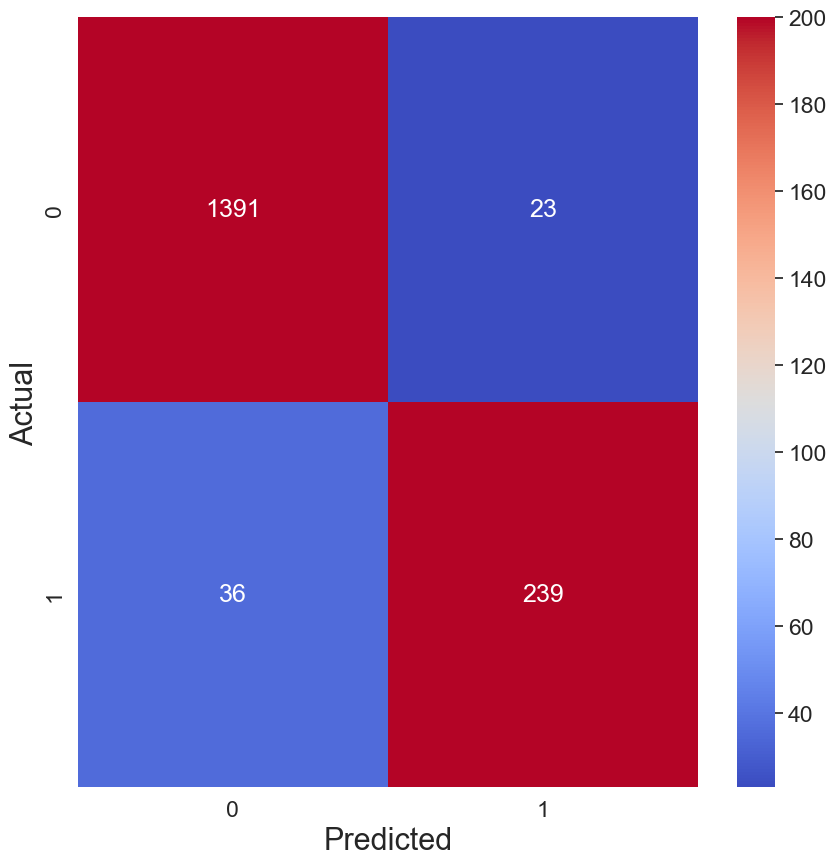

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix_df = confusion_matrix(y_test,preds)


plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [ ]:
# Build the KNN model
from sklearn.neighbors import KNeighborsClassifier
k = 5  # set the number of neighbors
model = KNeighborsClassifier(n_neighbors=k)

# Train the model
model.fit(X_train, y_train)

# Evaluate the model on test set
y_pred = model.predict(X_test)
test_acc = model.score(X_test, y_test)
print('\nTest accuracy:', test_acc)


Test accuracy: 0.8584961515689757


Text(86.25, 0.5, 'Actual')

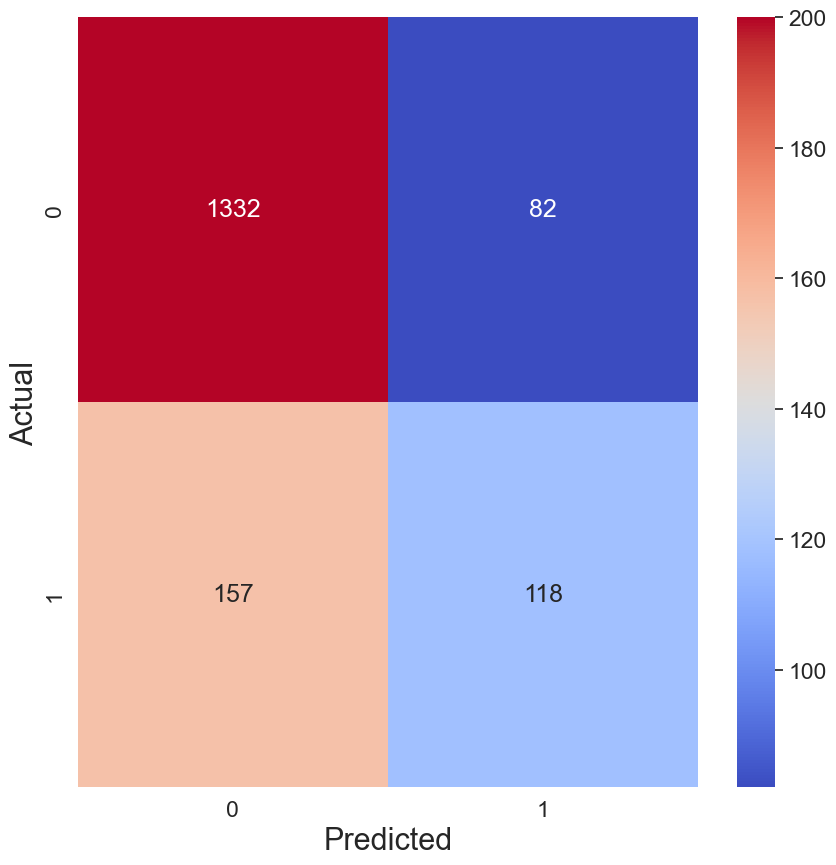

In [ ]:
conf_matrix_df = confusion_matrix(y_test,y_pred)


plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [ ]:
from sklearn.linear_model import LogisticRegression
lasso = LogisticRegression(penalty='l1', solver = 'saga', max_iter=2000, n_jobs=-1)
lasso.fit(X_train, y_train)
y_pred = lasso.predict(X_test)


Text(86.25, 0.5, 'Actual')

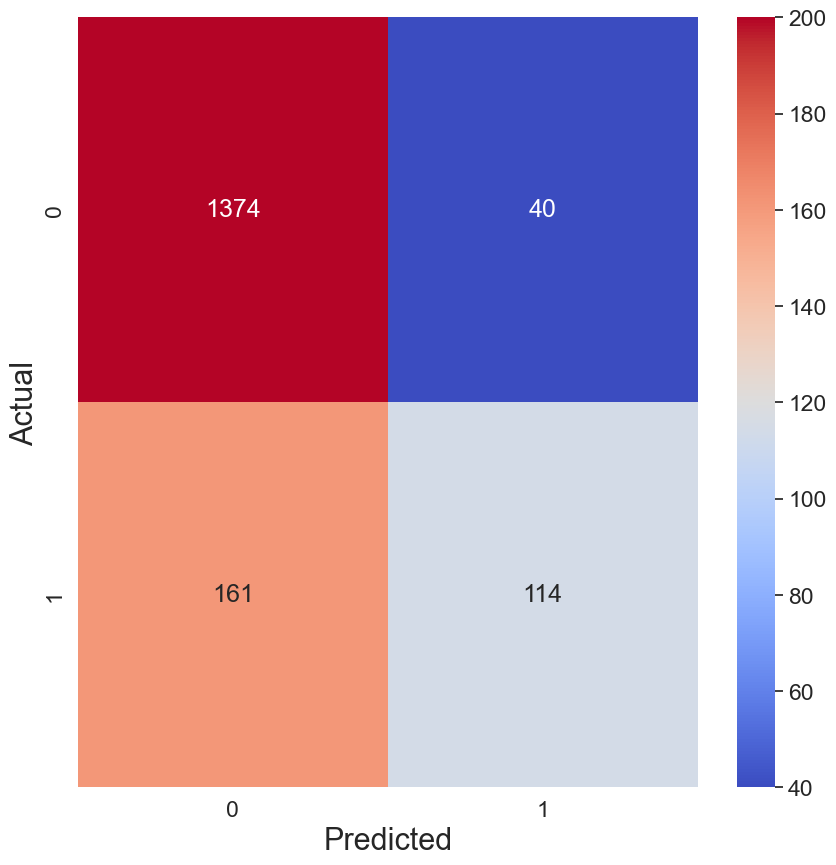

In [ ]:
conf_matrix_df = confusion_matrix(y_test,y_pred)


plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.97      0.93      1414
           1       0.74      0.41      0.53       275

    accuracy                           0.88      1689
   macro avg       0.82      0.69      0.73      1689
weighted avg       0.87      0.88      0.87      1689



In [ ]:
randomforesrt = RandomForestClassifier( random_state=20 ,n_estimators=100,n_jobs=-1)

# Train the model on the training set
randomforesrt.fit(X_train, y_train)

# Make predictions on the test set
y_pred = randomforesrt.predict(X_test)

# Evaluate the accuracy of the model
accuracy = (y_pred == y_test).sum().astype(float) / len(y_pred)*100
print("RandomForest's prediction accuracy is: %3.2f" % (accuracy))


RandomForest's prediction accuracy is: 96.33


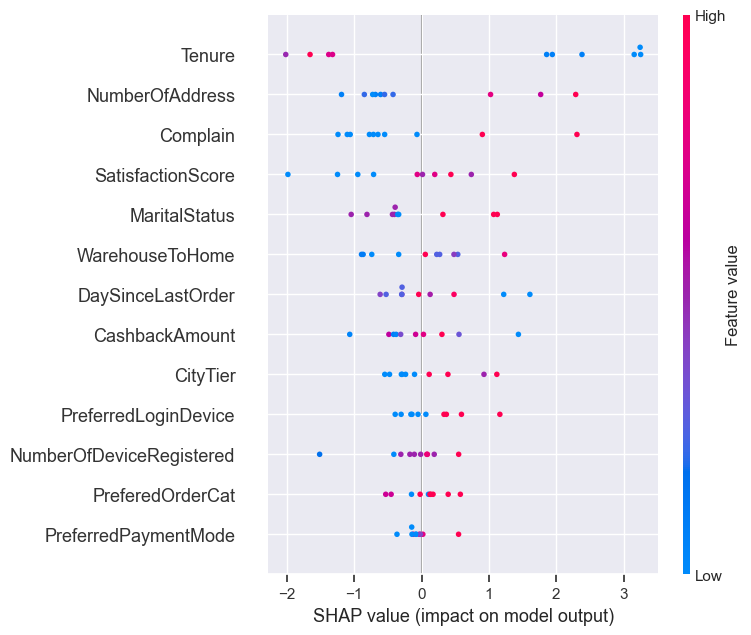

In [ ]:
import shap
shap.initjs()
mdl = xgb_clf
mdl.fit(X_train, y_train)
# explain the model
explainer = shap.TreeExplainer(mdl)
shap_values = explainer.shap_values(X_train[0:10])
# visualize the impact of each features
shap.summary_plot(shap_values, X_train[0:10])

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report

vclf = VotingClassifier(estimators=[('xgboost',xgb_clf), ('randomforesrt',randomforesrt), ('knn',model),('Logistic_Regression',lasso)])
vclf = vclf.fit(X_train,y_train)
vclf_pred = vclf.predict(X_test)
print("Classification report of Ensemble Voting Classifier: \n", classification_report(y_test, vclf_pred))

Classification report of Ensemble Voting Classifier: 
               precision    recall  f1-score   support

           0       0.97      0.98      0.98      1414
           1       0.91      0.85      0.88       275

    accuracy                           0.96      1689
   macro avg       0.94      0.92      0.93      1689
weighted avg       0.96      0.96      0.96      1689



Text(86.25, 0.5, 'Actual')

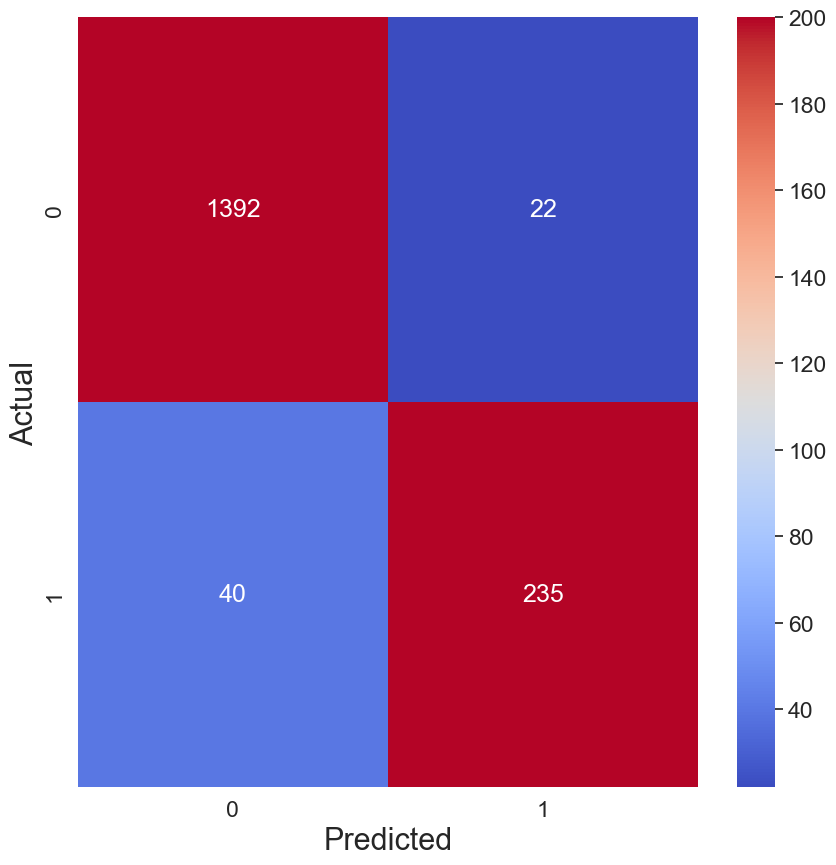

In [ ]:
conf_matrix_df = confusion_matrix(y_test,vclf_pred)


plt.figure(figsize=(10, 10))
sns.set(font_scale=1.5)

sns.heatmap(conf_matrix_df,
            cmap='coolwarm',
            annot=True,
            fmt='.5g',
            vmax=200)

plt.xlabel('Predicted',fontsize=22)
plt.ylabel('Actual',fontsize=22)

In [ ]:
import lime
from lime import lime_tabular

explainer = lime_tabular.LimeTabularExplainer(
    training_data=np.array(X_train),
    feature_names=X_train.columns,
    class_names=['bad', 'good'],
    mode='classification'
)

In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=randomforesrt.predict_proba
)

exp.show_in_notebook(show_table=True)

/Users/salman/Desktop/CSCN8010/CSCN8010/venv/CSCN8010_classic_ml/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
exp = explainer.explain_instance(
    data_row=X_test.iloc[1], 
    predict_fn=xgb_clf.predict_proba
)

exp.show_in_notebook(show_table=True)

### Customer Retention Programs: 
* Customers who place more orders tend to receive higher cashback amounts, indicating a correlation between order frequency and rewards. 
* Develop targeted retention programs aimed at customers with longer tenure. 
* Offer loyalty rewards, discounts, or exclusive offers to retain cutomers.

#### Couponing Boosts Engagement: 
* There is a positive association between coupon usage and order frequency, suggesting that customers who actively use coupons are more engaged with the brand. 
* Expanding coupon offerings and personalized discounts can stimulate repeat purchases and reinforce customer loyalty.

### Personalized Recommendations: 
* Provide personalized recommendations to customers based on their preference will increase their tenure.
* Build recommendation systems to applications 
* Use data analytics to suggest relevant products based on their purchase history and preferences, thereby enhancing their shopping experience.

### Enhanced Mobile App Features: 
* More customers prefer Mobile phone instead of computer.
* Invest in enhancing the mobile app experience to encourage customers to spend more time on the app. 
* Provide features such as personalized offers, easy navigation, and convenient checkout options to increase engagement and improve customer satisfaction.

### Coupon and Promotion Strategies: 
* Focus on promoting coupon usage by offering attractive discounts and promotions tied to specific order categories. 
* Because coupon usage and order count are positively correlated.
* Encourage customers to use coupons by highlighting the savings and benefits associated with each offer.

### Provide immediate Cashback and Rewards Programs on initial days of app usage: 
* Customer churn id nearly 50% if tenure is less than or eual to 1.
* Consider offering higher cashback amounts or bonus rewards initial days will decrease churn.

### Customer Feedback Mechanisms: 
* Establish effective feedback mechanisms to solicit input from customers regarding their shopping experiences.
* feedback from initial days of app usage, how they feel, suggestions to improve.
* Incorporate NLP sentiment analysis, classify the collected feedback to positive, negative , nuetral.
* Detailed analysis of the issuesin terms of item quality, price, service,maintenance, user friendliness of UI, payment, other issues. 
* Identify areas for improvement and implement changes to address customer concerns and preferences.

### Marital status single
* 50 percentage of churned customers are single.
* incorporate more app features, like spin and win, point system, daily rewards based on daily login and more programs that will help single persons to remain using the app.
* nearly 50% of non-churned are married, identify the specific needs and preferences of this category through segmentation and tailored marketing initiatives can enhance retention

### Recency Matters: 
* Recent purchasing activity is linked to lower churn rates, implying that customers who have made recent transactions are more likely to remain active. 
* Leveraging targeted re-engagement campaigns or timely follow-ups after purchases can help maintain customer interest and prevent attrition.